In [11]:
import pandas as pd

In [12]:
from sklearn.datasets import load_digits
digits = load_digits()

In [13]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [14]:
x = digits.data
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [15]:
y = digits.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
model_params = {
    'KNeighborsClassifier' : {
        'model' : KNeighborsClassifier(),
        'params' : {

            'n_neighbors' : [3, 5, 10]

        }
    }
}

In [21]:
from sklearn.model_selection import GridSearchCV

scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x,y)
    scores.append({
        'model': model_name,
        'best_score':clf.best_score_,
        'best_params': clf.best_params_
    })

In [22]:
import pandas as pd
df = pd.DataFrame(scores, columns=['model','best_score', 'best_params'])
df

,model,best_score,best_params
0,KNeighborsClassifier,0.966622,{'n_neighbors': 3}


In [39]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
from sklearn.metrics import confusion_matrix

y_predicted = knn.predict(x_test)

cm = confusion_matrix(y_test, y_predicted)

In [41]:
knn.score(x_test,y_test)

0.9916666666666667

Text(58.222222222222214, 0.5, 'Truth')

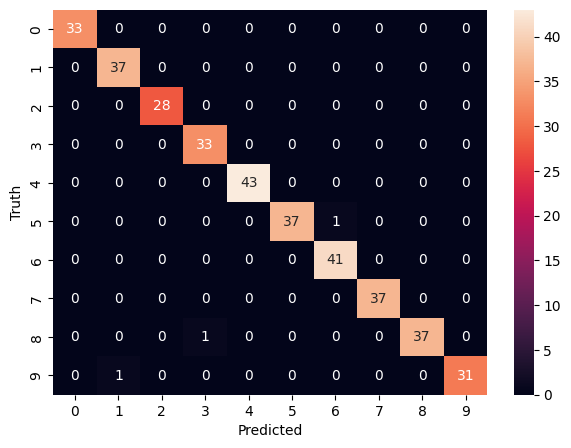

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.99        37
           2       1.00      1.00      1.00        28
           3       0.97      1.00      0.99        33
           4       1.00      1.00      1.00        43
           5       1.00      0.97      0.99        38
           6       0.98      1.00      0.99        41
           7       1.00      1.00      1.00        37
           8       1.00      0.97      0.99        38
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

